#  Winter trend analysis station Sonnblick

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

# Some defaults
cmap = plt.get_cmap('RdBu_r')
sns.set_context('talk')
sns.set_style('ticks')

## Read data and compute Nov-March averages

In [3]:
odf = pd.read_csv('HISTALP_AT_SON_T01_1760_2020.csv', skiprows=13, sep=';', index_col=0)
odf = odf[odf.columns[:12]]
odf = odf.where(odf != 999999).dropna(how='all')  / 10
odf.head()

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
year,,,,,,,,,,,,
1886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.7,-8.1,-12.4
1887,-12.6,-15.7,-10.8,-9.8,-6.8,-2.1,2.9,0.6,-1.4,-9.0,-9.1,-15.5
1888,-14.7,-15.5,-13.1,-9.5,-4.3,-0.5,-0.9,0.1,-0.1,-6.3,-7.4,-9.1
1889,-13.5,-17.4,-14.4,-10.2,-1.3,0.7,0.2,0.4,-4.0,-4.8,-7.9,-12.9
1890,-10.6,-15.7,-11.6,-9.2,-3.3,-2.9,0.4,2.2,-3.1,-7.0,-10.7,-14.1


In [4]:
# Tabularise
df = pd.DataFrame()
df['Year'] = np.repeat(odf.index, 12)
df['Month'] = np.tile(np.arange(1, 13), len(odf))
df['Temp'] = odf.values.flatten()

In [5]:
# Select winters
df = df.loc[df.Month.isin([11, 12, 1, 2, 3])].dropna()
assert (len(df) / 5) == (len(df) // 5)
dfw = pd.DataFrame(df.Temp.values, index=np.repeat(odf.index[1:], 5), columns=['Winter Temp'])
dfw = dfw.groupby(dfw.index).mean()
dfw.index.name = 'Year'

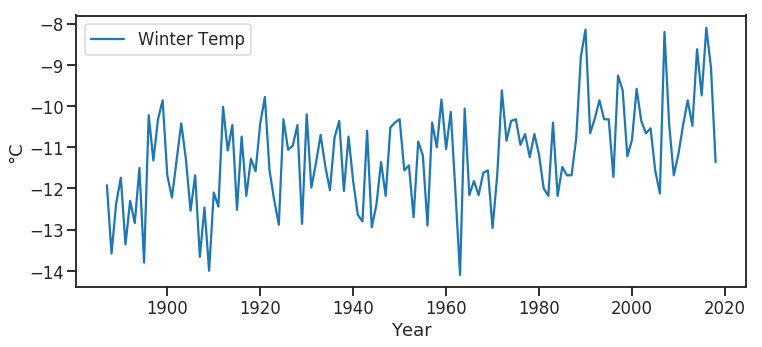

In [6]:
dfw.plot(figsize=(12, 5));
plt.ylabel('°C');

## Rolling averages (centered) 

In [7]:
dfw['11yr-avg'] = dfw['Winter Temp'].rolling(11, center=True, min_periods=11).mean()
dfw['21yr-avg'] = dfw['Winter Temp'].rolling(21, center=True, min_periods=21).mean()
dfw['31yr-avg'] = dfw['Winter Temp'].rolling(31, center=True, min_periods=31).mean()

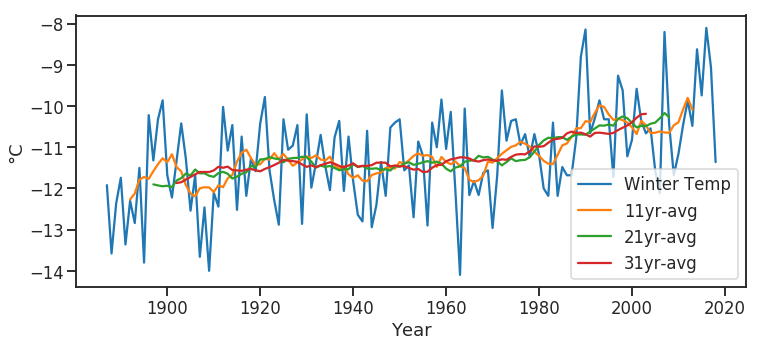

In [8]:
dfw.plot(figsize=(12, 5));
plt.ylabel('°C');

## Rolling trends (not centered)

Not centered means the value at year Y is the trend over the period Y-31 to Y

In [9]:
def trend_value(x):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x.index, x.values)
    return slope * 10  # for decadal trends

def trend_err(x):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x.index, x.values)
    return std_err

def trend_p(x):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x.index, x.values)
    return p_value

In [10]:
for p in [21, 31]:
    dfw['{}yr-trend'.format(p)] =dfw['Winter Temp'].rolling(p, min_periods=p).apply(trend_value, raw=False)
    dfw['{}yr-err'.format(p)] =dfw['Winter Temp'].rolling(p, min_periods=p).apply(trend_err, raw=False)
    dfw['{}yr-p'.format(p)] =dfw['Winter Temp'].rolling(p, min_periods=p).apply(trend_p, raw=False)

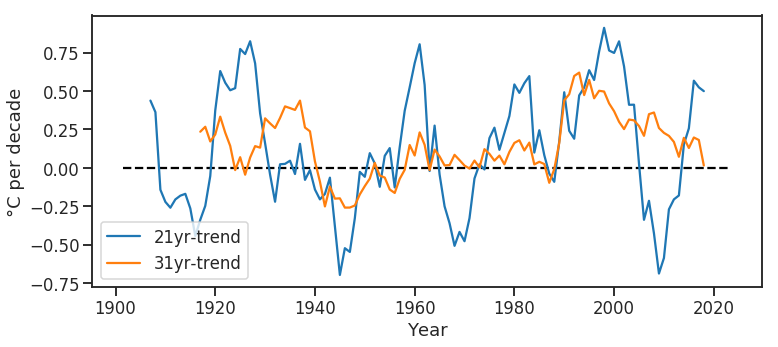

In [11]:
ax = dfw[['21yr-trend', '31yr-trend']].plot(figsize=(12, 5));
plt.hlines([0], *ax.get_xlim(), linestyle='--')
plt.ylabel('°C per decade');

## Now Jan-March (it has more cooling trend)

In [12]:
odf = pd.read_csv('HISTALP_AT_SON_T01_1760_2020.csv', skiprows=13, sep=';', index_col=0)
odf = odf[odf.columns[:12]]
odf = odf.where(odf != 999999).dropna(how='any')  / 10
odf.head()

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
year,,,,,,,,,,,,
1887,-12.6,-15.7,-10.8,-9.8,-6.8,-2.1,2.9,0.6,-1.4,-9.0,-9.1,-15.5
1888,-14.7,-15.5,-13.1,-9.5,-4.3,-0.5,-0.9,0.1,-0.1,-6.3,-7.4,-9.1
1889,-13.5,-17.4,-14.4,-10.2,-1.3,0.7,0.2,0.4,-4.0,-4.8,-7.9,-12.9
1890,-10.6,-15.7,-11.6,-9.2,-3.3,-2.9,0.4,2.2,-3.1,-7.0,-10.7,-14.1
1891,-16.4,-13.5,-12.1,-11.5,-3.1,-1.3,0.4,0.5,0.5,-3.5,-9.2,-11.4


In [13]:
dfw = odf[['jan', 'feb', 'mar']].mean(axis=1).to_frame(name='JFM')

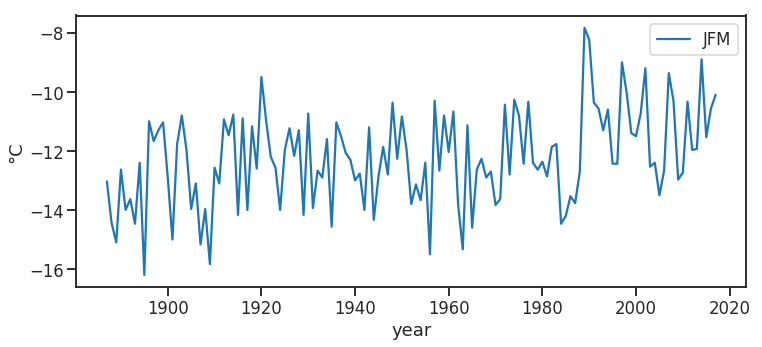

In [14]:
dfw.plot(figsize=(12, 5));
plt.ylabel('°C');

## Rolling averages (centered) 

In [15]:
dfw['11yr-avg'] = dfw['JFM'].rolling(11, center=True, min_periods=11).mean()
dfw['21yr-avg'] = dfw['JFM'].rolling(21, center=True, min_periods=21).mean()
dfw['31yr-avg'] = dfw['JFM'].rolling(31, center=True, min_periods=31).mean()

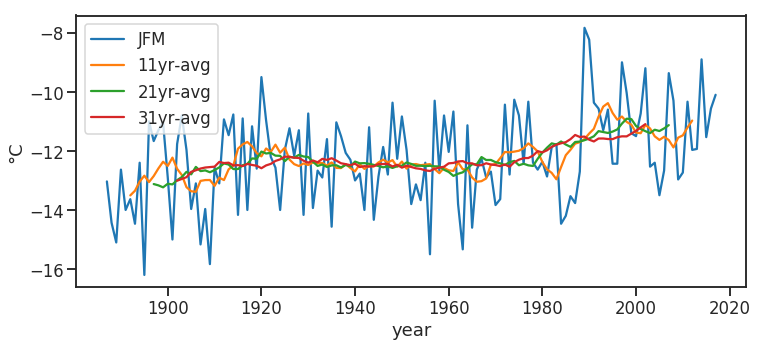

In [16]:
dfw.plot(figsize=(12, 5));
plt.ylabel('°C');

## Rolling trends (not centered)

Not centered means the value at year Y is the trend over the period Y-31 to Y

In [17]:
def trend_value(x):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x.index, x.values)
    return slope * 10  # for decadal trends

def trend_err(x):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x.index, x.values)
    return std_err

def trend_p(x):
    slope, intercept, r_value, p_value, std_err = stats.linregress(x.index, x.values)
    return p_value

In [18]:
for p in [21, 31]:
    dfw['{}yr-trend'.format(p)] =dfw['JFM'].rolling(p, min_periods=p).apply(trend_value, raw=False)
    dfw['{}yr-err'.format(p)] =dfw['JFM'].rolling(p, min_periods=p).apply(trend_err, raw=False)
    dfw['{}yr-p'.format(p)] =dfw['JFM'].rolling(p, min_periods=p).apply(trend_p, raw=False)

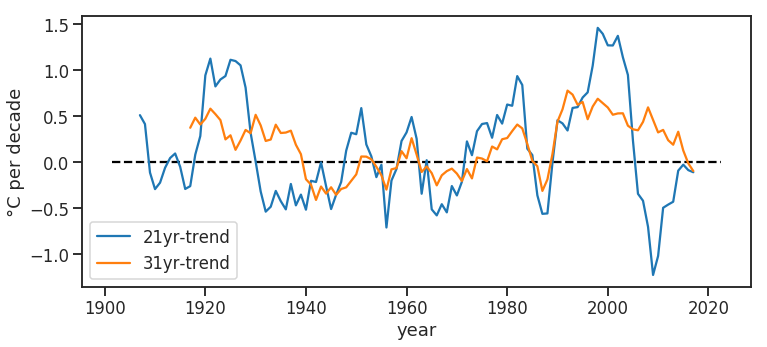

In [19]:
ax = dfw[['21yr-trend', '31yr-trend']].plot(figsize=(12, 5));
plt.hlines([0], *ax.get_xlim(), linestyle='--')
plt.ylabel('°C per decade');

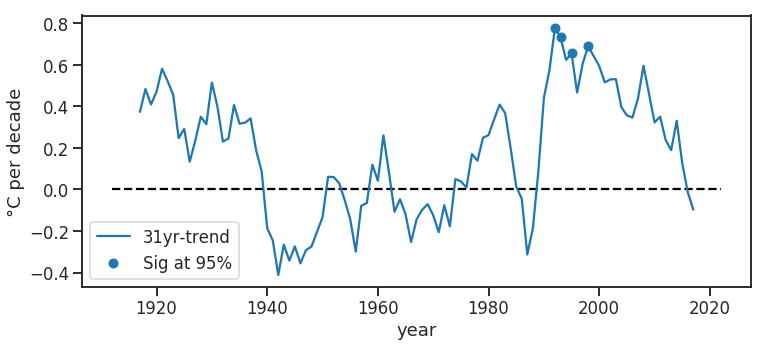

In [20]:
ax = dfw[['31yr-trend']].plot(figsize=(12, 5));
sig = dfw['31yr-trend'].where(dfw['31yr-p'] < 0.05)
sig.plot(ax=ax, style='o', c='C0', label='Sig at 95%')
plt.hlines([0], *ax.get_xlim(), linestyle='--')
plt.ylabel('°C per decade'); plt.legend();

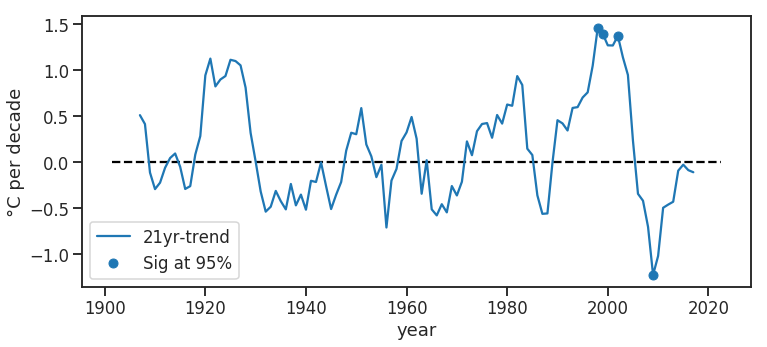

In [21]:
ax = dfw[['21yr-trend']].plot(figsize=(12, 5));
sig = dfw['21yr-trend'].where(dfw['21yr-p'] < 0.05)
sig.plot(ax=ax, style='o', c='C0', label='Sig at 95%')
plt.hlines([0], *ax.get_xlim(), linestyle='--')
plt.ylabel('°C per decade'); plt.legend();

### Triangle plot 

In [22]:
# the trend are computed on time series at least 20yrs long
ts = dfw.JFM
start_years = ts.index[:-20]
end_years = ts.index[20:]
ny = len(start_years)
extent = (start_years[0], start_years[-1], end_years[0], end_years[-1])  # needed for the plot later

# fill the triangle
trend = np.zeros((ny, ny)) * np.NaN
sig = np.ones((ny, ny)) 
for i, start_year in enumerate(start_years):
    for j, end_year in enumerate(end_years):
        data = ts.loc[start_year:end_year]
        if len(data) < 21:
            continue
        slope, _, _, p_val, _ = stats.linregress(data.index, data.values)
        trend[j, i] = slope * 10  # for decadal trends
        sig[j, i] = p_val

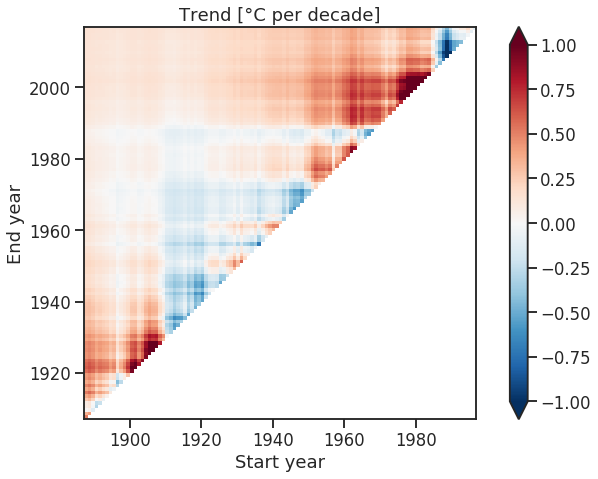

In [23]:
# plot
plt.figure(figsize=(10, 7))
im = plt.imshow(trend, extent=extent, interpolation='none', origin='lower', cmap=cmap, vmin=-1, vmax=1)
plt.colorbar(im, extend='both');
plt.title('Trend [°C per decade]');
plt.xlabel('Start year');
plt.ylabel('End year');
plt.tight_layout()

## Interactive 

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
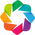

In [24]:
import holoviews as hv
from bokeh.models import HoverTool
hv.extension('bokeh')

In [25]:
# simple trick to workaround https://github.com/ioam/holoviews/issues/2730
def set_active_drag(plot, element):
    plot.state.toolbar.active_drag = None

In [26]:
data = {'Start year':start_years, 'End year':end_years, 'Trend':trend, 'pvalue':sig}

In [27]:
%%opts QuadMesh [tools=['hover'] fontsize={'title':12, 'xlabel':12, 'ylabel':12, 'ticks':10}]
qm = hv.QuadMesh(data, ['Start year', 'End year'], 'Trend', label='JFM Trends at Sonnblick (°C per decade)')
qm = qm.redim(Trend=dict(range=(-0.5, 0.5)))
qm = qm.options(cmap='RdBu_r', width=760, height=700, finalize_hooks=[set_active_drag], 
                colorbar=True, toolbar=None)
qm

:QuadMesh   [Start year,End year]   (Trend)

In [28]:
# Save as HTML
renderer = hv.renderer('bokeh')
renderer.save(qm, 'triangle')